In [1]:
#Import the dependences
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

#import the requests library
import requests

#import the API Key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs =  np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
            # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
            # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | pilna
Processing Record 6 of Set 1 | yumen
Processing Record 7 of Set 1 | atasu
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | butia
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | san patricio
Processing Record 12 of Set 1 | inderborskiy
City not found. Skipping...
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | tuatapere
Processing Record 15 of Set 1 | cayenne
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | tambun
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | hobyo
Processing Record 20 of Set 1 | salinas
Processing Record 21 of Set 1 | shingu
Processing Record 22 of Set 1 | kaeo
Processing Record 23 of Set 1 |

Processing Record 39 of Set 4 | nome
Processing Record 40 of Set 4 | new norfolk
Processing Record 41 of Set 4 | anadyr
Processing Record 42 of Set 4 | rudbar
Processing Record 43 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | yulara
Processing Record 46 of Set 4 | yuksekova
Processing Record 47 of Set 4 | birao
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | arraial do cabo
Processing Record 50 of Set 4 | namibe
Processing Record 1 of Set 5 | mar del plata
Processing Record 2 of Set 5 | vasudevanallur
Processing Record 3 of Set 5 | karratha
Processing Record 4 of Set 5 | gusau
Processing Record 5 of Set 5 | morehead
Processing Record 6 of Set 5 | flinders
Processing Record 7 of Set 5 | fukue
Processing Record 8 of Set 5 | coquimbo
Processing Record 9 of Set 5 | adigeni
Processing Record 10 of Set 5 | husavik
Processing Record 11 of Set 5 | huntsville
Processing Record 12 of Set 5 | uvira


Processing Record 30 of Set 8 | dire
Processing Record 31 of Set 8 | kuznetsk
Processing Record 32 of Set 8 | chesma
Processing Record 33 of Set 8 | praia
Processing Record 34 of Set 8 | calama
Processing Record 35 of Set 8 | faanui
Processing Record 36 of Set 8 | sorland
Processing Record 37 of Set 8 | lanxi
Processing Record 38 of Set 8 | gat
Processing Record 39 of Set 8 | mudgee
Processing Record 40 of Set 8 | ryotsu
Processing Record 41 of Set 8 | saleaula
City not found. Skipping...
Processing Record 42 of Set 8 | halalo
City not found. Skipping...
Processing Record 43 of Set 8 | brejo santo
Processing Record 44 of Set 8 | kathu
Processing Record 45 of Set 8 | lumby
Processing Record 46 of Set 8 | satitoa
City not found. Skipping...
Processing Record 47 of Set 8 | dok kham tai
Processing Record 48 of Set 8 | braedstrup
Processing Record 49 of Set 8 | gorno-chuyskiy
City not found. Skipping...
Processing Record 50 of Set 8 | nuuk
Processing Record 1 of Set 9 | ourossogui
Processin

Processing Record 16 of Set 12 | saint-etienne-du-rouvray
Processing Record 17 of Set 12 | novovarshavka
Processing Record 18 of Set 12 | aras
Processing Record 19 of Set 12 | empalme
Processing Record 20 of Set 12 | longonjo
Processing Record 21 of Set 12 | makurdi
Processing Record 22 of Set 12 | schuttorf
Processing Record 23 of Set 12 | ancud
Processing Record 24 of Set 12 | riaba
City not found. Skipping...
Processing Record 25 of Set 12 | markova
Processing Record 26 of Set 12 | vila velha
Processing Record 27 of Set 12 | hay river
Processing Record 28 of Set 12 | qabis
City not found. Skipping...
Processing Record 29 of Set 12 | bodden town
Processing Record 30 of Set 12 | te anau
Processing Record 31 of Set 12 | puerto cabezas
Processing Record 32 of Set 12 | taree
Processing Record 33 of Set 12 | yirol
City not found. Skipping...
Processing Record 34 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 35 of Set 12 | takoradi
Processing Record 36 of Set 12 |

In [9]:
len(city_data)

579

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.13,70,7,4.38,PF,2021-04-19 05:09:33
1,Hilo,19.7297,-155.0900,75.20,69,90,5.75,US,2021-04-19 05:09:33
2,Kavieng,-2.5744,150.7967,84.72,70,96,9.13,PG,2021-04-19 05:09:34
3,Bredasdorp,-34.5322,20.0403,62.60,88,100,8.05,ZA,2021-04-19 05:09:34
4,Pilna,55.5539,45.9219,38.50,57,100,16.24,RU,2021-04-19 05:09:35
5,Yumen,40.2833,97.2000,63.10,20,51,14.50,CN,2021-04-19 05:09:35
6,Atasu,48.6814,71.6433,51.19,63,60,15.93,KZ,2021-04-19 05:09:36
7,Hermanus,-34.4187,19.2345,63.00,91,100,3.00,ZA,2021-04-19 05:09:36
8,Butia,-30.1197,-51.9622,59.88,94,0,4.36,BR,2021-04-19 05:09:37
9,Saint-Philippe,-21.3585,55.7679,77.00,83,90,14.97,RE,2021-04-19 05:09:37


In [11]:
new_column_order = ["City","Country","Date","Lat", "Lng", "Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-04-19 05:09:33,-23.1203,-134.9692,78.13,70,7,4.38
1,Hilo,US,2021-04-19 05:09:33,19.7297,-155.0900,75.20,69,90,5.75
2,Kavieng,PG,2021-04-19 05:09:34,-2.5744,150.7967,84.72,70,96,9.13
3,Bredasdorp,ZA,2021-04-19 05:09:34,-34.5322,20.0403,62.60,88,100,8.05
4,Pilna,RU,2021-04-19 05:09:35,55.5539,45.9219,38.50,57,100,16.24
5,Yumen,CN,2021-04-19 05:09:35,40.2833,97.2000,63.10,20,51,14.50
6,Atasu,KZ,2021-04-19 05:09:36,48.6814,71.6433,51.19,63,60,15.93
7,Hermanus,ZA,2021-04-19 05:09:36,-34.4187,19.2345,63.00,91,100,3.00
8,Butia,BR,2021-04-19 05:09:37,-30.1197,-51.9622,59.88,94,0,4.36
9,Saint-Philippe,RE,2021-04-19 05:09:37,-21.3585,55.7679,77.00,83,90,14.97


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

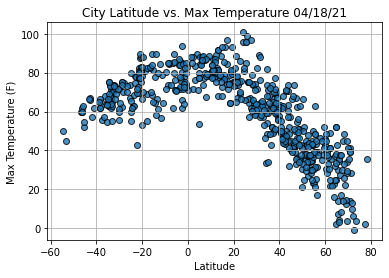

In [14]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

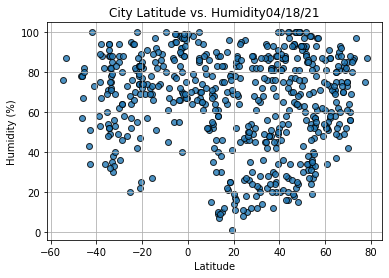

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

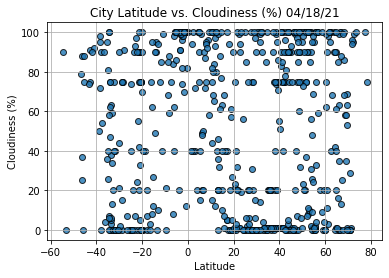

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

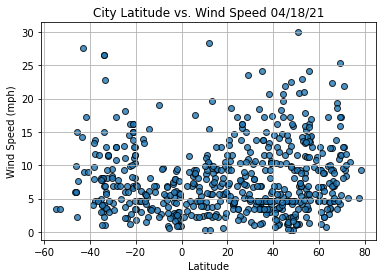

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [35]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [52]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

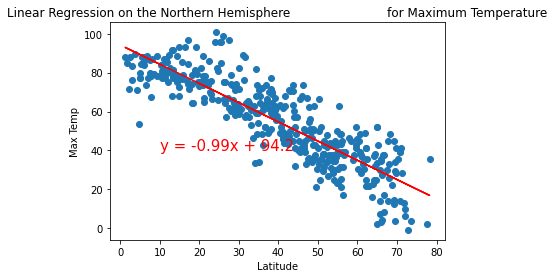

In [59]:
# Linear regression on the Northern Hemisphere (Max Temp)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

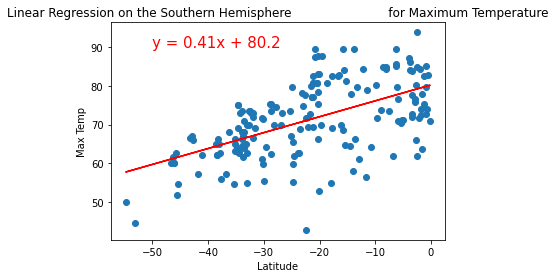

In [60]:
# Linear regression on the Southern Hemisphere (Max Temp)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

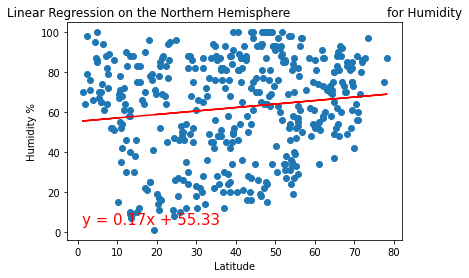

In [61]:
# Linear regression on the Northern Hemisphere (Humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Humidity', 'Humidity %',(1,4))

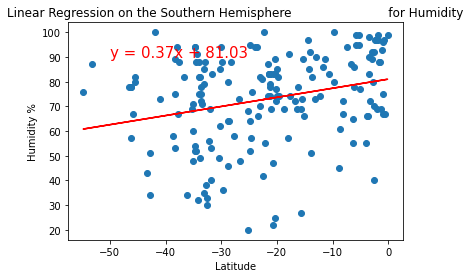

In [62]:
# Linear regression on the Southern Hemisphere (Humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Humidity', 'Humidity %',(-50,90))

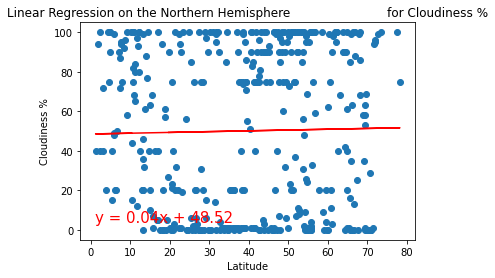

In [63]:
# Linear regression on the Northern Hemisphere (Cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness %', 'Cloudiness %',(1,4))

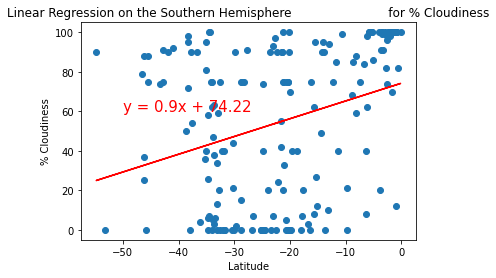

In [66]:
# Linear regression on the Southern Hemisphere (Cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

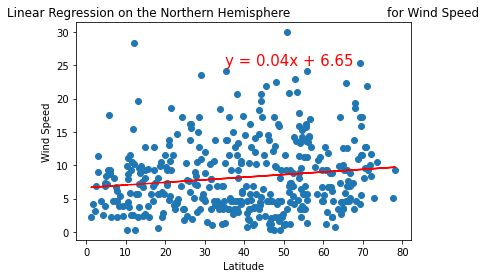

In [78]:
# Linear regression on the Northern Hemisphere (Wind Speed)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(35,25))

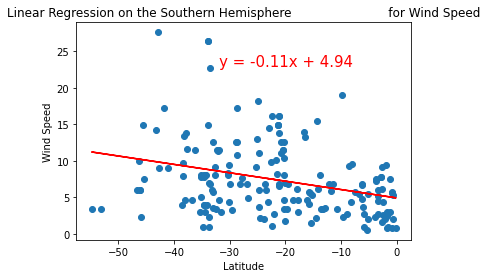

In [84]:
# Linear regression on the Southern Hemisphere (Wind Speed)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-32,23))